In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

seed=9
np.random.seed(seed)

In [2]:
def load_mnist_dataset(path='mnist.npz'):
    from tensorflow.keras.utils import get_file
    path = get_file(path, origin='https://s3.amazonaws.com/img-datasets/mnist.npz')
    f = np.load(path)
    x_train= f['x_train']
    y_train= f['y_train']
    x_test= f['x_test']
    y_test= f['y_test']
    
    f.close()
    
    return(x_train, y_train), (x_test, y_test)

In [3]:
def visualize_mnist():
    (X_train, y_train), (X_test, y_test) = load_mnist_dataset('mnist.npz')
    plt.subplot(321)
    plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
    plt.subplot(322)
    plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
    plt.subplot(323)
    plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
    plt.subplot(324)
    plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
    plt.subplot(325)
    plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
    plt.subplot(326)
    plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
    plt.show()

In [13]:
def create_compile_model_mlp(num_pixels, num_classes):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_pixels/2, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
def print_model(model,fich):
    from tensorflow.keras.utils import plot_model
    
    plot_model(model, to_file=fich, show_shapes=True, show_layer_names=True)

In [6]:
def print_history_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def print_history_loss(history):
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [11]:
def mnist_utilizando_mlp():
    (X_train, y_train), (X_test, y_test) = load_mnist_dataset('mnist.npz')
    
    # transformar a matriz 28*28 das imagens num vector com 784 atributos para cada imagem (porque é multilayer-perceptron)
    num_pixels= X_train.shape[1] * X_train.shape[2]
    X_train= X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
    X_test= X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
    
    # normalizar os valores dos pixeis de 0-255 para 0-1
    X_train= X_train/ 255
    X_test= X_test/ 255
    
    # transformar o label que é um inteiro em categorias binárias, o valor passa a ser o correspondente à posição
    # o 5 passa a ser a lista [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    num_classes= y_test.shape[1]
    
    # definir a topologia da rede e compilar 
    model = create_compile_model_mlp(num_pixels, num_classes)
    print_model(model,"model.png")
    
    # treinar a rede 
    history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=2)
    print_history_accuracy(history)
    print_history_loss(history)
    
    # Avaliação final com os casos de teste
    scores = model.evaluate(X_test, y_test, verbose=0)
    print('Scores: ', scores)
    print("Erro modelo MLP: %.2f%%"% (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 - 1s - loss: 0.2337 - accuracy: 0.9318 - val_loss: 0.1206 - val_accuracy: 0.9631
Epoch 2/100
60000/60000 - 1s - loss: 0.0824 - accuracy: 0.9747 - val_loss: 0.0861 - val_accuracy: 0.9724
Epoch 3/100
60000/60000 - 1s - loss: 0.0499 - accuracy: 0.9838 - val_loss: 0.0681 - val_accuracy: 0.9797
Epoch 4/100
60000/60000 - 1s - loss: 0.0320 - accuracy: 0.9902 - val_loss: 0.0603 - val_accuracy: 0.9813
Epoch 5/100
60000/60000 - 1s - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0587 - val_accuracy: 0.9833
Epoch 6/100
60000/60000 - 1s - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0694 - val_accuracy: 0.9803
Epoch 7/100
60000/60000 - 1s - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0674 - val_accuracy: 0.9811
Epoch 8/100
60000/60000 - 1s - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.0711 - val_accuracy: 0.9822
Epoch 9/100
60000/60000 - 1s - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.0723 - val_accuracy: 0.9826
Epoch

Epoch 76/100
60000/60000 - 1s - loss: 1.2290e-08 - accuracy: 1.0000 - val_loss: 0.1318 - val_accuracy: 0.9856
Epoch 77/100
60000/60000 - 1s - loss: 1.0922e-08 - accuracy: 1.0000 - val_loss: 0.1322 - val_accuracy: 0.9858
Epoch 78/100
60000/60000 - 1s - loss: 9.8467e-09 - accuracy: 1.0000 - val_loss: 0.1330 - val_accuracy: 0.9857
Epoch 79/100
60000/60000 - 1s - loss: 8.8175e-09 - accuracy: 1.0000 - val_loss: 0.1335 - val_accuracy: 0.9859
Epoch 80/100
60000/60000 - 1s - loss: 8.0049e-09 - accuracy: 1.0000 - val_loss: 0.1343 - val_accuracy: 0.9857
Epoch 81/100
60000/60000 - 1s - loss: 7.1406e-09 - accuracy: 1.0000 - val_loss: 0.1353 - val_accuracy: 0.9857
Epoch 82/100
60000/60000 - 1s - loss: 6.5009e-09 - accuracy: 1.0000 - val_loss: 0.1357 - val_accuracy: 0.9857
Epoch 83/100
60000/60000 - 1s - loss: 5.8472e-09 - accuracy: 1.0000 - val_loss: 0.1361 - val_accuracy: 0.9856
Epoch 84/100
60000/60000 - 1s - loss: 5.3326e-09 - accuracy: 1.0000 - val_loss: 0.1370 - val_accuracy: 0.9857
Epoch 85/1

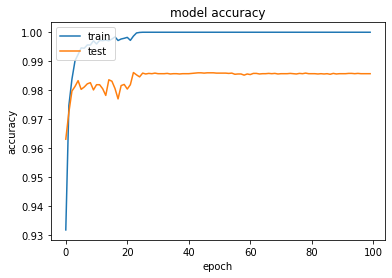

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


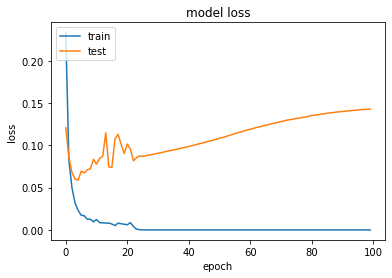

Scores:  [0.14288297188350613, 0.9857]
Erro modelo MLP: 1.43%


In [14]:
if __name__ == '__main__':
    #visualize_mnist()
    mnist_utilizando_mlp()